In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
118641,2011-11-09,PerthAirport,10.5,21.8,1.6,5.2,10.6,WSW,37.0,NNE,...,55.0,39.0,1017.8,1017.3,3.0,4.0,18.3,20.9,Yes,No
71324,2011-08-20,Mildura,6.4,19.9,0.2,1.8,6.9,NW,19.0,SSW,...,100.0,57.0,1030.5,1029.0,8.0,4.0,8.6,18.8,No,No
142595,2013-12-17,Katherine,22.7,37.0,19.4,10.4,NaN,SW,37.0,S,...,71.0,61.0,1009.4,1004.6,1.0,7.0,29.1,36.2,Yes,No
117069,2015-12-14,PearceRAAF,10.8,28.2,0.0,NaN,13.3,SW,44.0,W,...,61.0,42.0,1014.7,1013.0,NaN,NaN,22.3,26.5,No,No
114914,2009-10-22,PearceRAAF,6.6,25.2,0.0,NaN,11.3,SW,41.0,S,...,64.0,50.0,1017.3,1015.0,0.0,5.0,17.4,24.0,No,No


In [3]:
df.nunique(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(Date             3436
 Location           49
 MinTemp           389
 MaxTemp           505
 Rainfall          681
 Evaporation       358
 Sunshine          145
 WindGustDir        16
 WindGustSpeed      67
 WindDir9am         16
 WindDir3pm         16
 WindSpeed9am       43
 WindSpeed3pm       44
 Humidity9am       101
 Humidity3pm       101
 Pressure9am       546
 Pressure3pm       549
 Cloud9am           10
 Cloud3pm           10
 Temp9am           441
 Temp3pm           502
 RainToday           2
 RainTomorrow        2
 dtype: int64,
 None)

## Converting the Object into Date into DateTime datatype and extracting the year and month from the Date

In [4]:
df.Date = pd.to_datetime(df.Date, format="%Y/%m/%d", errors='raise')
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [5]:
df["Year"]=pd.DatetimeIndex(df.Date).year
df["Month"]=pd.DatetimeIndex(df.Date).month
df.drop("Date", axis="columns", inplace=True)
df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
9719,CoffsHarbour,14.8,22.7,0.0,4.4,7.4,SW,39.0,SW,E,...,1017.8,1014.9,3.0,7.0,21.2,21.7,No,Yes,2010,10
26756,Penrith,7.8,23.2,0.0,NaN,NaN,WNW,41.0,NaN,W,...,NaN,NaN,NaN,NaN,14.1,20.0,No,No,2016,5
53547,MountGinini,5.6,15.6,0.2,NaN,NaN,WSW,54.0,W,W,...,NaN,NaN,NaN,NaN,7.9,14.7,No,No,2013,3
95542,Townsville,15.9,29.7,0.0,7.0,10.7,NE,31.0,SE,NE,...,1017.7,1013.4,1.0,1.0,25.3,28.7,No,No,2015,5
144998,Uluru,22.5,33.2,0.4,NaN,NaN,ENE,31.0,E,WSW,...,1013.1,1010.3,1.0,NaN,27.6,31.5,No,No,2016,3


In [6]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Year               int64
Month              int64
dtype: object

## Missing value imputation in the numeric columns and dropping rows from object columns with nan and null values

In [7]:
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtypes in ["float64", "int64"]:
            df[col].fillna(np.mean(df[col]), inplace = True)
            
fill_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [8]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  object 
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  object 
 9   WindDir3pm     123710 non-null  object 
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

## Splitting the data into dependent and Independent Variables.
## Slitting the independent variables into numerical and categorical data

In [9]:
X = df.drop("RainTomorrow", axis = "columns")
y= df["RainTomorrow"]
y = [1 if ele=="Yes" else 0 for ele in y]
y = pd.Series(y, name="target")

In [10]:
num_df = X.select_dtypes(include="number")
cat_df = X.select_dtypes(include="object")

In [11]:
num_df.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
64792,1.8,11.2,4.6,3.800000,2.900000,57.0,31.0,35.0,74.0,62.0,1005.60000,999.700000,7.000000,7.00000,6.7,10.3,2010,8
100191,4.3,22.4,0.0,2.400000,10.100000,31.0,13.0,11.0,100.0,48.0,1027.70000,1024.000000,2.000000,1.00000,9.9,21.7,2010,10
124970,12.6,21.4,0.0,5.468232,7.611178,37.0,13.0,17.0,57.0,48.0,1017.64994,1015.255889,4.447461,4.50993,16.5,20.4,2012,3
78135,3.6,14.7,0.0,2.000000,4.600000,24.0,4.0,15.0,99.0,98.0,1022.90000,1021.600000,2.000000,7.00000,6.3,12.1,2009,5
129044,11.6,15.2,0.0,5.468232,7.611178,33.0,13.0,20.0,72.0,74.0,1031.60000,1029.500000,4.447461,4.50993,12.7,14.6,2015,4


In [12]:
cat_df.sample(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
141898,Darwin,ESE,E,ENE,No
117188,PearceRAAF,ENE,ENE,ENE,No
139753,Darwin,W,WSW,W,Yes
6739,Cobar,NE,NE,ENE,Yes
112964,Witchcliffe,W,W,WSW,Yes


## Bi Variate Analysis for Categorical Data

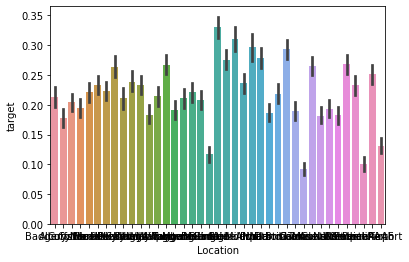

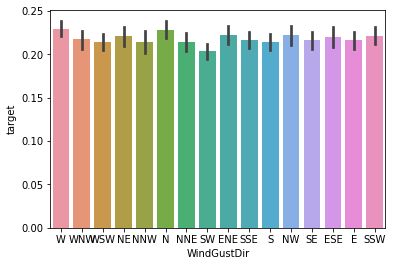

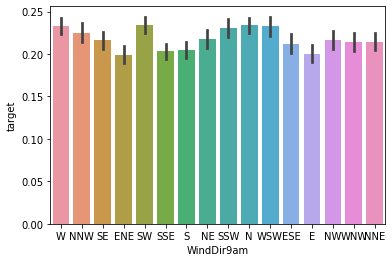

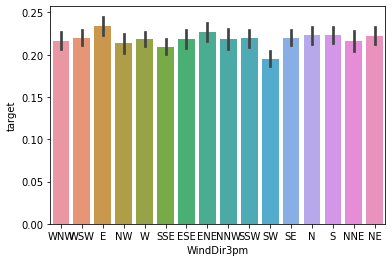

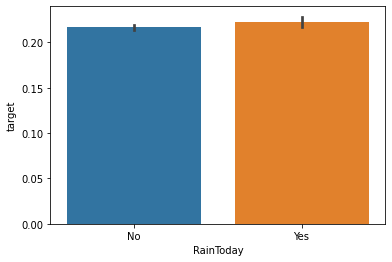

In [13]:
cat_df_merged = pd.concat([y, cat_df], axis = 1, join ="inner")
for col in cat_df.columns:
    plt.figure()
    sns.barplot(x=col, y="target", data=cat_df_merged)
plt.show()

In [14]:
# It can be inferred from the plot that the all catgorical columns have same frequency of data regarding the target columns.
# Hence we can remove all these categorical data

## Capping and flooring of the outliers in numerical Variables

In [15]:
def outlier_cap(X):
    X = X.clip(lower=X.quantile(0.01))
    X=X.clip(upper=X.quantile(0.99))
    return X

num_df = num_df.apply(lambda x: outlier_cap(x))
num_df.shape

(123710, 18)

## Feature Selection - Numerical Features
Remove features with 0 variance

In [16]:
from sklearn.feature_selection import VarianceThreshold

var_selector = VarianceThreshold(threshold=0)
var_selector.fit(num_df)
cols = var_selector.get_support(indices=True)
num_df = num_df.iloc[:,cols]
num_df.shape

(123710, 18)

In [17]:
num_df.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
118487,5.1,19.8,0.0,2.2,9.2,50.0,13.0,31.0,69.0,44.0,1028.1,1025.4,1.0,1.0,13.7,19.4,2011.0,6
14117,22.4,37.7,0.0,16.0,12.6,63.0,30.0,9.0,40.0,15.0,1017.2,1012.6,3.0,1.0,26.7,36.1,2014.0,11
62911,10.2,22.2,1.2,6.0,11.0,35.0,17.0,11.0,63.0,41.0,1020.1,1018.3,2.0,1.0,15.2,21.6,2013.0,12
99990,8.3,22.1,0.0,4.0,7.2,33.0,15.0,24.0,68.0,50.0,1025.0,1023.9,7.0,2.0,16.0,21.1,2010.0,3
67044,13.3,22.2,0.0,4.4,10.6,33.0,22.0,19.0,65.0,49.0,1014.9,1015.2,7.0,4.0,15.4,21.7,2017.0,1


In [18]:
X = num_df

## Checking the class imbalance 

In [19]:
y.value_counts(normalize=True)*100

0    77.857893
1    22.142107
Name: target, dtype: float64

The datasets seems to be imbalanced dataset so we will use SMOTE technique to handle this problem.

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    96318
1    96318
Name: target, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=40, stratify=y_sm)
X_train.shape, y_train.shape

((154108, 18), (154108,))

In [22]:
X_test.shape, y_test.shape

((38528, 18), (38528,))

In [23]:
mm_sc = MinMaxScaler()
X_train_sc = mm_sc.fit_transform(X_train)
X_test_sc = mm_sc.transform(X_test)
X_train_sc[0:5]

array([[0.72091398, 0.5713598 , 0.00780781, 0.21998925, 0.1018763 ,
        0.39817944, 0.21710898, 0.26880728, 0.7916712 , 0.89091337,
        0.03500485, 0.04392353, 0.96771775, 0.90728225, 0.66171116,
        0.47088054, 0.50183512, 0.        ],
       [0.55094739, 0.75      , 0.        , 0.32488664, 0.7518797 ,
        0.28125   , 0.18918919, 0.28205128, 0.21686747, 0.08988764,
        0.50301205, 0.53703704, 0.55593266, 0.56374126, 0.69964664,
        0.74193548, 0.55555556, 0.90909091],
       [0.26044644, 0.25771232, 0.00497391, 0.32488664, 0.57226899,
        0.27523907, 0.18621854, 0.40321063, 0.75969828, 0.69477673,
        0.99519953, 0.99694683, 0.55593266, 0.56374126, 0.38267254,
        0.29971494, 0.32722699, 0.63636364],
       [0.80650579, 0.67628205, 0.        , 0.42307692, 0.57226899,
        0.3125    , 0.35135135, 0.46153846, 0.1686747 , 0.48920355,
        0.48192771, 0.44444444, 0.875     , 1.        , 0.70318021,
        0.69677419, 0.55555556, 0.45454545],
    

In [24]:
'''from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.48, 0.5, 0.57, 0.58]
n_estimators_list = [80, 100]
max_depth_list = [4, 6]
max_features_list = [4, 6]
random_state_list = [0]
best_hyper_parameter = {"n_estimators": 0, "learning_rate":0, "max_depth":0, "max_features":0, "random_state": 0}
best_train_accuracy = 0
best_test_accuracy = 0

for lr in lr_list:
    print(f"learning Rate: {lr}")
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            for random_state in random_state_list:
                for max_features in max_features_list:
                    gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, 
                                                        learning_rate=lr, max_depth=max_depth, 
                                                        max_features=max_features, random_state=random_state)
                    gb_clf.fit(X_train_sc, y_train)
                    train_accuracy = gb_clf.score(X_train_sc, y_train)
                    test_accuracy = gb_clf.score(X_test_sc, y_test)
                    print(f"test accuracy: {test_accuracy}")
                    print(f"train accuracy: {train_accuracy}")
                    if train_accuracy>=test_accuracy:
                        if test_accuracy > best_test_accuracy :
                            best_hyper_parameter["n_estimators"] = n_estimators
                            best_hyper_parameter["learning_rate"] = lr
                            best_hyper_parameter["max_depth"] = max_depth
                            best_hyper_parameter["max_features"] = max_features
                            best_hyper_parameter["random_state"] = random_state
                            best_train_accuracy = train_accuracy
                            best_test_accuracy = test_accuracy  '''

'from sklearn.ensemble import GradientBoostingClassifier\n\nlr_list = [0.48, 0.5, 0.57, 0.58]\nn_estimators_list = [80, 100]\nmax_depth_list = [4, 6]\nmax_features_list = [4, 6]\nrandom_state_list = [0]\nbest_hyper_parameter = {"n_estimators": 0, "learning_rate":0, "max_depth":0, "max_features":0, "random_state": 0}\nbest_train_accuracy = 0\nbest_test_accuracy = 0\n\nfor lr in lr_list:\n    print(f"learning Rate: {lr}")\n    for n_estimators in n_estimators_list:\n        for max_depth in max_depth_list:\n            for random_state in random_state_list:\n                for max_features in max_features_list:\n                    gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, \n                                                        learning_rate=lr, max_depth=max_depth, \n                                                        max_features=max_features, random_state=random_state)\n                    gb_clf.fit(X_train_sc, y_train)\n                    train_accuracy 

In [25]:
#best_train_accuracy, best_test_accuracy

In [26]:
#best_hyper_parameter

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
best_gb_clf = GradientBoostingClassifier(n_estimators=100, 
                                                        learning_rate=0.5, max_depth=6, 
                                                        max_features=4, random_state=0)
best_gb_clf.fit(X_train_sc, y_train)
train_accuracy = best_gb_clf.score(X_train_sc, y_train)
test_accuracy = best_gb_clf.score(X_test_sc, y_test)

y_pred = best_gb_clf.predict(X_test_sc)
print(accuracy_score(y_test, y_pred))

0.9032132475083057


In [28]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19264
           1       0.93      0.88      0.90     19264

    accuracy                           0.90     38528
   macro avg       0.90      0.90      0.90     38528
weighted avg       0.90      0.90      0.90     38528



## XGBOOST CLASSIFIER

In [29]:
'''from xgboost import XGBClassifier

boosters = ["gbtree"]
n_estimators = [80, 100]
etas = [0.2, 0.3, 0.4]
max_depths = [6,8, 10]
best_train_score = 0
best_test_score = 0
best_hyper_parameter = {"n_estimators": 0, "eta":0, "max_depth":0, "booster": ""}


for boost in boosters:
    print(f"booster: {boost}")
    for n_est in n_estimators:
        for lr in etas:
            for max_dt in max_depths:
                xgb_clf = XGBClassifier(use_label_encoder=False,
                                        booster=boost,
                                       n_estimators=n_est,
                                       eta=lr,
                                       max_depth=max_dt)
                
                xgb_clf.fit(X_train_sc, y_train)
                train_score = xgb_clf.score(X_train_sc, y_train)
                test_score = xgb_clf.score(X_test_sc, y_test)
                if train_score>=test_score:
                    if test_score > best_test_score:
                        best_train_score = train_score
                        best_test_score = test_score
                        best_hyper_parameter["n_estimators"] = n_est
                        best_hyper_parameter["eta"] = lr
                        best_hyper_parameter["max_depth"] = max_dt
                        best_hyper_parameter["booster"] = boost
                        print(f"best train score: {best_train_score}")
                        print(f"best test score: {best_test_score}")'''


'from xgboost import XGBClassifier\n\nboosters = ["gbtree"]\nn_estimators = [80, 100]\netas = [0.2, 0.3, 0.4]\nmax_depths = [6,8, 10]\nbest_train_score = 0\nbest_test_score = 0\nbest_hyper_parameter = {"n_estimators": 0, "eta":0, "max_depth":0, "booster": ""}\n\n\nfor boost in boosters:\n    print(f"booster: {boost}")\n    for n_est in n_estimators:\n        for lr in etas:\n            for max_dt in max_depths:\n                xgb_clf = XGBClassifier(use_label_encoder=False,\n                                        booster=boost,\n                                       n_estimators=n_est,\n                                       eta=lr,\n                                       max_depth=max_dt)\n                \n                xgb_clf.fit(X_train_sc, y_train)\n                train_score = xgb_clf.score(X_train_sc, y_train)\n                test_score = xgb_clf.score(X_test_sc, y_test)\n                if train_score>=test_score:\n                    if test_score > best_test_score:\

In [30]:
#best_train_accuracy, best_test_accuracy

In [31]:
#best_hyper_parameter

In [32]:
from xgboost import XGBClassifier
best_xgb_clf = XGBClassifier(use_label_encoder=False,
                                        booster='gbtree',
                                       n_estimators=100,
                                       eta=0.2,
                                       max_depth=10)
                
best_xgb_clf.fit(X_train_sc, y_train)
y_pred = best_xgb_clf.predict(X_test_sc)
print(accuracy_score(y_test, y_pred))

0.9112074335548173
